In [ ]:
import pandas as pd 

# For numerical arrays
import numpy as np 

# For visualizations
import matplotlib.pyplot as plt

import seaborn as sns

In [ ]:
#!pip install pyspellchecker
# import all necessary libraries

# For dataframes
import pandas as pd 

# For numerical arrays
import numpy as np 

# For stemming/Lemmatisation/POS tagging
import spacy

# For getting stopwords
from spacy.lang.en.stop_words import STOP_WORDS

# For K-Fold cross validation
from sklearn.model_selection import KFold

# For visualizations
import matplotlib.pyplot as plt

# For regular expressions
import re

# For handling string
import string

# For all torch-supported actions
import torch

# For spell-check
# from spellchecker import SpellChecker

# For performing mathematical operations
import math

# For dictionary related activites
from collections import defaultdict

# For counting actions (EDA)
from collections import  Counter

# For count vectorisation (EDA)
from sklearn.feature_extraction.text import CountVectorizer

# For one-hot encoding
from tensorflow.keras.utils import to_categorical

# For DL model
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding, LSTM
from tensorflow.keras.models import Model, Sequential

# For generating random integers
from random import randint

#For making wordclouds
from wordcloud import WordCloud 

# For TF-IDF vectorisation
from sklearn.feature_extraction.text import TfidfVectorizer

# For padding
from tensorflow.keras.preprocessing.sequence import pad_sequences

# For tokenization
from tensorflow.keras.preprocessing.text import Tokenizer

# For plotting
import seaborn as sns

print("Necessary libraries imported")

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [ ]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = 'https://drive.google.com/file/d/1d-RwlndEiOUN8qf9UyTrRcSiH7Y5_J4K/view?usp=sharing'

# to get the id part of the file
id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('train.csv')
df = pd.read_csv('train.csv')

In [ ]:
df.head(10)

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
5,00004f9a462a357c33be,"Is Gaza slowly becoming Auschwitz, Dachau or T...",0
6,00005059a06ee19e11ad,Why does Quora automatically ban conservative ...,0
7,0000559f875832745e2e,Is it crazy if I wash or wipe my groceries off...,0
8,00005bd3426b2d0c8305,"Is there such a thing as dressing moderately, ...",0
9,00006e6928c5df60eacb,Is it just me or have you ever been in this ph...,0


In [ ]:
print(df.isnull().sum())

qid              0
question_text    0
target           0
dtype: int64


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Dataset Description

Total rows in dataset:  1306122 Rows

Dataset Columns: 
Index(['qid', 'question_text', 'target'], dtype='object')

 Null Statistics:
qid              0
question_text    0
target           0
dtype: int64

 Frequency of Insincere Questions: 
       question_text         
               count   unique
target                       
0            1225312  1225312
1              80810    80810

 Pie Plot of Targets


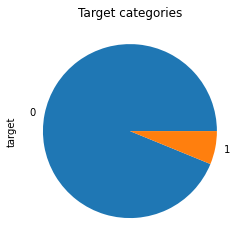

In [ ]:
print('Total rows in dataset: ', len(df), 'Rows\n')
print('Dataset Columns: ')
print(df.columns)
print('\n Null Statistics:')
print(df.isnull().sum())
print('\n Frequency of Insincere Questions: ')
print(df.groupby("target").describe().loc[:,[('question_text',  'count'),('question_text', 'unique')]])
print('\n Pie Plot of Targets')
df.target.value_counts().plot(title='Target categories', kind='pie')

Word length vs. target

Boxplot for Target vs total words


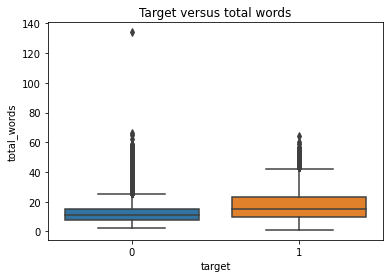

In [ ]:
df['total_words']=df.question_text.apply(lambda x: len(x.split()))
print("Boxplot for Target vs total words")
plt.plot(figsize=(8,15)) 
plt.title('Target versus total words')

sns.boxplot(data=df,
    x="target", y="total_words")
plt.show()